<a href="https://colab.research.google.com/github/lrojasm407/Fall2022/blob/main/CE200A_Problem_Set_6_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE200A: Environmental Fluid Mechanics

### Problem Set 6

**Course Professor:** Tina Chow (tinakc@berkeley.edu) (CEE, UC Berkeley)

**GSI:** Alexandre Georges (alexandre_georges@berkeley.edu) (CEE, UC Berkeley)

**Python expert:** Ajay B Harish (ajaybh@berkeley.edu) (SimCenter, UC Berkeley), and Adam Wise (adamwise@berkeley.edu) (CEE, UC Berkeley)

---

### Due date

Oct. 07 at 5pm PDT

There are 2 problems - #1 uses CoLab and #2 is pencil/paper. Describe the setup and each step in your solutions with words and clearly label your final answers. Use Python in Google CoLab for plotting and programming and include your code when you submit your problem set. Go to Runtime -> Run all, then use the File -> Print feature inside Google CoLab which allows you to make a nice pdf of your code and plots.

###Question 0

If you are not already comfortable with Python, it might help to spend 1-2 hours going through the Python resources. (You don’t have to show any work for this part.)

### Question 1

Consider the first-order forward difference, second-order central difference, and fourth- order central difference approximations (as given in lecture) to the first derivative of $f(x) = \sin(5x)$.

Plot the exact derivative and the three approximations on the same plot for $0 \le x \le 3$ and $N = 16$. (Don’t worry about points near the boundaries, just leave out those values.)

Evaluate the derivative at $x = 1.5$ and plot the absolute value of the differences from the exact solution as a function of $\Delta x$ on a log-log plot. Use $N = 8, 16, 32, \cdots, 2048$ where $N$ is the number of grid cells. 

**Note:** Below you will find a Python script to assist you with this problem. Make sure to copy this CoLab file into your own Google Drive so you can edit it directly. There are key places in the script that have been erased - they are marked by three question marks (???) and you need to replace all of those with the correct information for the script to work.

In [ ]:
# Reset all variables
%reset -f

# Import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

[0.84405857 1.0006247  1.02057459 1.01549382 1.00907125 1.00486991
 1.00251895 1.00128053]
[1.8088941  1.95238935 1.98810869 1.9970279  1.99925702 1.99981426
 1.99995356 1.99998839]
[3.54537454 3.8866469  3.97168745 3.99292357 3.99823101 3.99955748
 3.99989508 3.99993328]


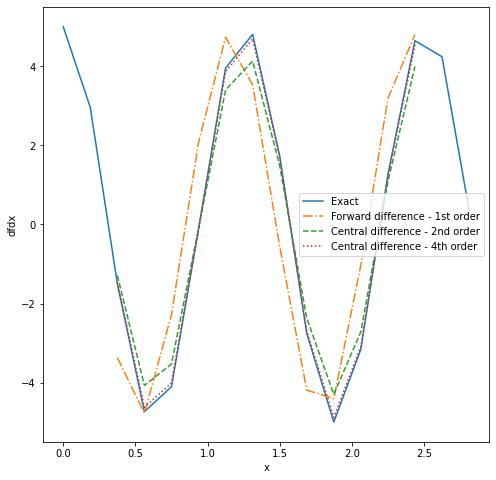

In [ ]:
# Define the variables that do not change for different grids
L = 3 #Length of domain

# Define the list of grid sizes 
# N is the number of points in domain
N =  [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

# Initialize array for storing values
dx = np.array([])
error_1st = np.array([])
error_2nd = np.array([])
error_4th = np.array([])


# Loop over all grid sizes
for ii in N:

    # Define resolution-dependent variables
    deltax = L/ii #Grid spacing
    x = np.arange(0,L,deltax) #Define x, grid
    nx = len(x) #Number of points in grid

    # Function to be differentiated
    f=np.sin(5*x)

    # Exact analytical derivative
    dfdx_exact = 5*np.cos(5*x)

    # Initialize with NaN. This isn't necessary but makes plotting better
    dfdx_1st = np.nan*np.ones(len(x)) #take an array of ones of length x and multiply by NaN
    dfdx_2nd = np.nan*np.ones(len(x))
    dfdx_4th = np.nan*np.ones(len(x))

    # Compute derivates with three different approximations
    for jj in range(2, nx-2): #notice the limits here
        dfdx_1st[jj] = (f[jj+1]-f[jj])/deltax # First-order forward [hint: f[jj+1] gives the value of f at x_{j+1}]
        dfdx_2nd[jj] = (f[jj+1]-f[jj-1])/(2*deltax) # Second-order central
        dfdx_4th[jj] = (f[jj-2]-8*f[jj-1]+8*f[jj+1]-f[jj+2])/(12*deltax) # Fourth-order central

    # Plot the exact and approximate derivatives for the case where N = 16
    if ii == 16:
        # Plot error function
        fig, main_ax = plt.subplots()
        fig.set_size_inches(8, 8) #this just makes the figure a bit bigger below
        main_ax.plot(x, dfdx_exact,'-', x, dfdx_1st,'-.', x, dfdx_2nd,'--', x, dfdx_4th,':')
        main_ax.set_xlabel('x')
        main_ax.set_ylabel('dfdx')
        main_ax.legend(['Exact','Forward difference - 1st order', 
                        'Central difference - 2nd order', 'Central difference - 4th order'])
        
    # Extract the errors at the midpoint of the domain (x = 1.5)
    dx = np.append(dx,deltax) #Store the current dx by appending to an array for plotting
    midpoint = np.where(x==1.5)[0]#Get midpoint index: use np.where to write a formula that will give you the correct midpoint index for different values of N?
    error_1st = np.append(error_1st,abs(dfdx_1st[midpoint[0]]-dfdx_exact[midpoint[0]])) #compute the difference between the finite difference and the exact answer and append it to the storage array
    error_2nd = np.append(error_2nd,abs(dfdx_2nd[midpoint[0]]-dfdx_exact[midpoint[0]])) 
    error_4th = np.append(error_4th,abs(dfdx_4th[midpoint[0]]-dfdx_exact[midpoint[0]]))

# Calculate the slope of the lines
slope_1st = np.diff(np.log(error_1st), axis=0)/np.diff(np.log(dx)) #check what np.diff does if you're not sure
slope_2nd = np.diff(np.log(error_2nd), axis=0)/np.diff(np.log(dx))
slope_4th = np.diff(np.log(error_4th), axis=0)/np.diff(np.log(dx))
print(slope_1st)
print(slope_2nd)
print(slope_4th)

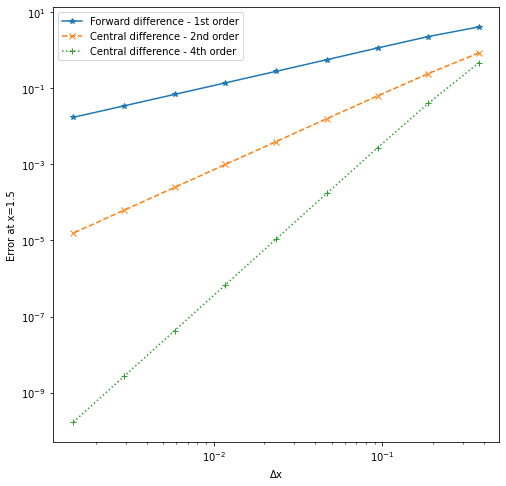

In [ ]:
# Plot dx versus error at x = 1.5
fig, main_ax = plt.subplots()
fig.set_size_inches(8, 8)
main_ax.loglog(dx, error_1st,'-*', dx, error_2nd,'x--', dx, error_4th,'+:')
main_ax.set_xlabel('$\Delta$x')
main_ax.set_ylabel('Error at x=1.5')
main_ax.legend(['Forward difference - 1st order',
                'Central difference - 2nd order', 'Central difference - 4th order'])

[link text](https://)Discuss your plot.


For the first order aproximation, the errors behave linearly with spacing, if delta is reduced by factor of 2, then the error is also reduced by a factor of 2. For the second order aprox, the error do not behave linearly and spacing has an even more significant effect. Finally, we are getting the smallest errors for 4th order. 


### Question 02

Use a Taylor table to construct the most accurate formula for the first derivative at $x_i$ using known function values of $f$ at $x_{i−2}, x_{i−1}, x_{i}$ and $x_{i+1}$, assuming the points are uniformly spaced. Include the leading error term and state the “order” of the method. See the handout and video in bcourses for help on how to do this problem.

(You can scan your handwritten solution and combine into one pdf file for submission.)